In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

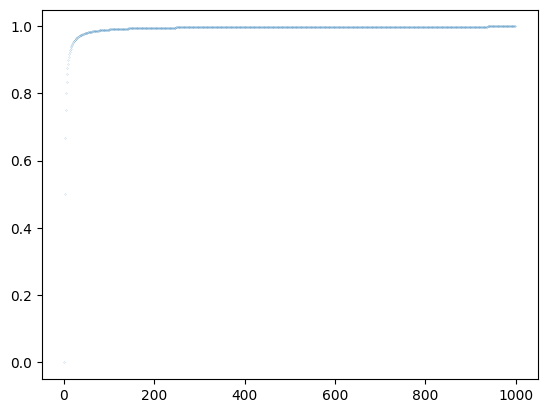

In [9]:
n=sp.S('n')
seq=(n-1)/n
y=sp.lambdify(n,seq)
x=np.arange(1,1000)
plt.scatter(x,y(x),s=0.01)

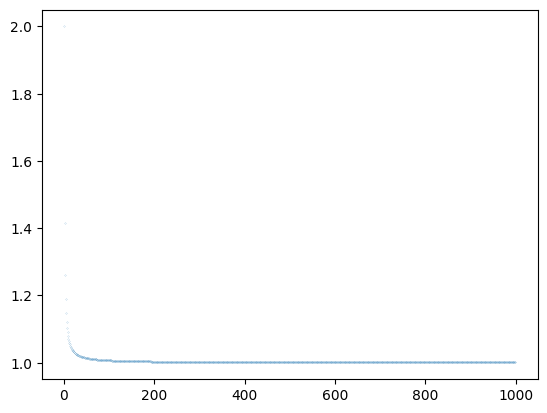

In [12]:
expr=2**(1/n)
f=sp.lambdify(n,expr)
x=np.arange(1,1000)
plt.scatter(x,f(x),s=0.01)

In [ ]:
inner=(n+1)/(n-1)
ind=inner.diff()
sp.cancel((1/inner)*ind)

expr=sp.ln((n+1)/(n-1))
sp.sympify(sp.cancel(expr.diff()))

-2/(n**2 - 1)

In [ ]:
fac=sp.factorial(n)
expr=100**n/fac

expr,sp.limit(expr,n,sp.oo)
expr

100**n/factorial(n)

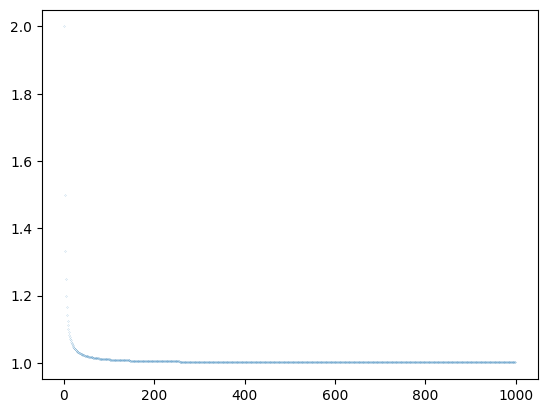

In [34]:
x=np.arange(1,1000)
y=(1+x)/x

plt.scatter(x,y,s=0.01)

### 泰勒公式
超越函数构造成多项式的理解:
想象你想用乐高积木（多项式的项 $(x−a)^k$ ）去搭建一个复杂雕塑（比如 sin(x) 的形状）的近似模型。 你不是把雕塑本身融化了重塑成乐高块，而是根据雕塑在某一点的形状、弯曲度、弯曲度的变化率等等（对应函数值、一阶导数、二阶导数……），来选择合适的乐高块并把它们拼起来

In [50]:
# 
coff=sp.symbols('c0:20')
x=sp.symbols('x')

                        19                        18                         1
- 1.06340159947443e-17⋅x   + 1.9971490628864e-19⋅x   + 2.90889238336273e-15⋅x 

7                        16                         15                        
  - 7.3603420484717e-18⋅x   - 7.66139281164123e-13⋅x   + 1.1151657075681e-16⋅x

14                         13                         12                      
   + 1.60600939986748e-10⋅x   - 9.00695728343637e-16⋅x   - 2.50521508621132e-8

  11                        10                        9                       
⋅x   + 4.1995111680981e-15⋅x   + 2.75573201582794e-6⋅x  - 1.13930386100383e-14

  8                         7                         6                       
⋅x  - 0.000198412698515544⋅x  + 1.70438377256387e-14⋅x  + 0.00833333333337966⋅

 5                         4                      3                         2 
x  - 1.19517956170581e-14⋅x  - 0.166666666666672⋅x  + 2.28276138335993e-15⋅x  

                              
+ 1.0⋅x - 5.381

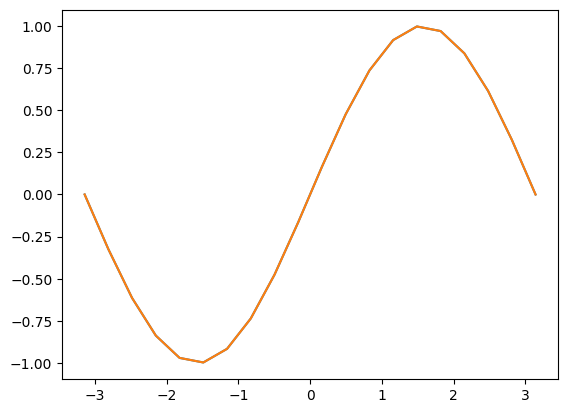

In [52]:
xx=np.linspace(-np.pi,np.pi,20)
yy=np.sin(xx)
expr=sp.S(0)
for i,c in enumerate(coff):
   expr=expr+c*x**i 
sys=[expr.subs(x,a)-b for a,b in zip(xx,yy)]
result=sp.solve(sys,coff)
f=sp.lambdify(x,expr.subs(result))
sp.pprint(expr.subs(result))
plt.plot(xx,f(xx))
plt.plot(xx,np.sin(xx))

### 级数的收敛判断 convergence
1. 第n项判别法:$\lim\limits_{n \to \infty} a_n=0收敛反之$
2. 几何级数$\sum a_n=a_1*r+a_2*r^2+...$:若$\left\vert r \right\vert>1发散;若\left\vert r \right\vert <= 1收敛$

3. p-级数判别法$\sum_{n=1}^\infty \frac{1}{n^p}$:若p>1收敛;若p<=1发散
4. 非负项和或绝对值收敛:若$\sum \left\vert a_n\right\vert$收敛原函数收敛
5. 交错级数判别法$\sum a_n = u_1 - u_2 + u_3 - ..$

/var/folders/m4/fgyn19bn1cb4vzrvd9hbd2xr0000gn/T/ipykernel_2119/617695115.py:2: RuntimeWarning: divide by zero encountered in divide
  y=1/(1-x)


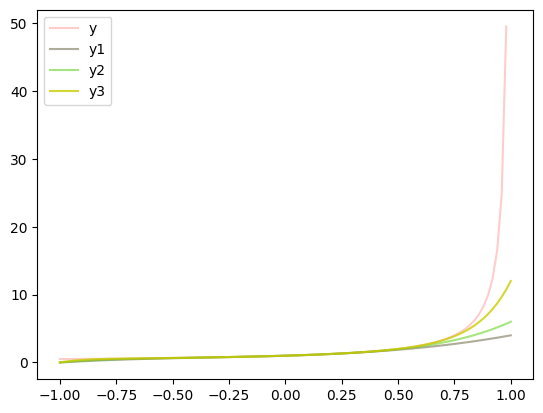

In [14]:
x=np.linspace(-1,1,100)
y=1/(1-x)

plt.plot(x,y,label='y',c='r',alpha=0.2)
y1=1+x+x**2+x**3
plt.plot(x,y1,label='y1',c=(0.2,0.2,0),alpha=0.4)
y2=1+x+x**2+x**3+x**4+x**5
plt.plot(x,y2,label='y2',c=(0.3,0.8,0),alpha=0.5)
y3=1+x+x**2+x**3+x**4+x**5+x**6+x**7+x**8+x**9+x**10+x**11
plt.plot(x,y3,label='y3',c=(0.8,0.8,0),alpha=0.8)
plt.legend()

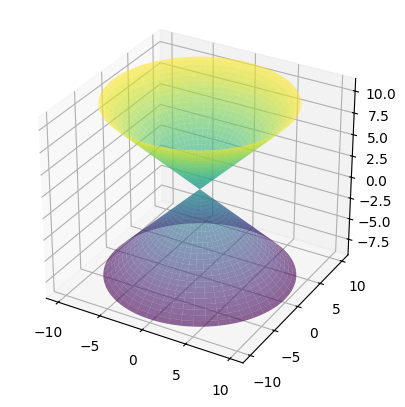

In [26]:
n=100
theta=np.linspace(0,2*np.pi,n)
x=np.linspace(-10,10,n)

X,T=np.meshgrid(x,theta)

y=X+1

fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
xx=np.cos(T)*X
yy=np.sin(T)*X
zz=y
ax.plot_surface(xx,yy,zz,cmap='viridis',alpha=0.6)
ax.set_aspect('equal')